In [1]:
import clickhouse_connect
client = clickhouse_connect.get_client(host='localhost', username='default', password='')

def q(s):
    return client.query(s).result_rows

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
q('SELECT count(*) FROM db.pkts')

[(7080,)]

In [4]:
q('SELECT * FROM db.pkts ORDER BY time LIMIT 20')

[('Unknown',
  1701870364826803,
  86,
  0,
  'Ethernet',
  0,
  'Ipv6',
  0,
  'Icmp',
  'NotExist'),
 ('Unknown',
  1701870365170003,
  60,
  0,
  'Ethernet',
  0,
  'Unknown',
  0,
  'NotExist',
  'NotExist'),
 ('(87.240.129.131, 443, Tls) --> (192.168.50.209, 45666, Tls)',
  1701870365251736,
  410,
  0,
  'Ethernet',
  0,
  'Ipv4',
  0,
  'Tcp',
  'Tls'),
 ('(192.168.50.209, 45666, Tls) --> (87.240.129.131, 443, Tls)',
  1701870365251800,
  66,
  0,
  'Ethernet',
  0,
  'Ipv4',
  0,
  'Tcp',
  'Tls'),
 ('(192.168.50.209, 45666, Tls) --> (87.240.129.131, 443, Tls)',
  1701870365266884,
  219,
  0,
  'Ethernet',
  0,
  'Ipv4',
  0,
  'Tcp',
  'Tls'),
 ('(2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 50004, Tls) --> (2a06:98c1:52::4, 443, Tls)',
  1701870365267623,
  142,
  0,
  'Ethernet',
  0,
  'Ipv6',
  0,
  'Tcp',
  'Tls'),
 ('(2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 50004, Tls) --> (2a06:98c1:52::4, 443, Tls)',
  1701870365267677,
  245,
  0,
  'Ethernet',
  0,
  'Ipv6',
  0,
  'Tc

('Ipv4', 'Ipv6', 'Unknown', 'Arp') (3049, 4007, 22, 2)


<BarContainer object of 4 artists>

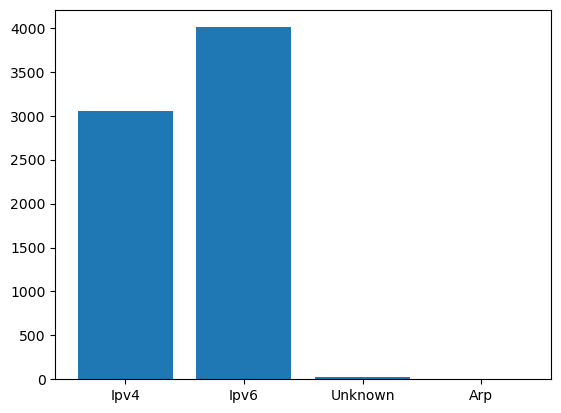

In [5]:
x, y = zip(*q('SELECT l3_proto, COUNT(*) FROM db.pkts GROUP BY l3_proto'))
print(x, y)
plt.bar(x, y)

('Http', 'Tls', 'Quic', 'NotExist') (118, 6767, 121, 74)


<BarContainer object of 4 artists>

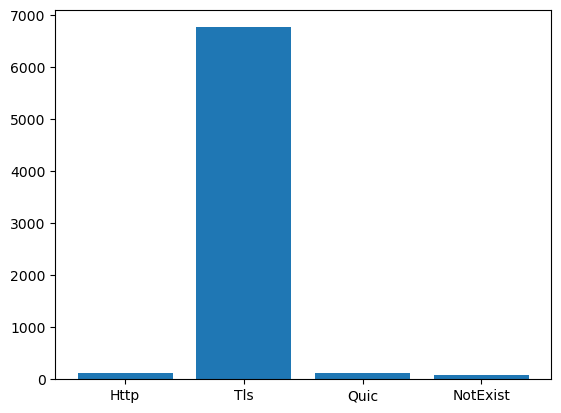

In [6]:
x, y = zip(*q('SELECT l7_proto, COUNT(*) FROM db.pkts GROUP BY l7_proto'))
print(x, y)
plt.bar(x, y)

In [15]:
r = q(
    """
    SELECT flow, (max(time) - min(time)) / 1000000 as duration, sum(size) as size_b, (size_b / duration) * 8 / 1000 / 1000 as thpt
    FROM db.pkts
    WHERE flow <> 'Unknown'
    GROUP BY flow
    HAVING size_b > 0 AND duration > 0.0
    ORDER BY thpt DESC
    """
)
df = pd.DataFrame(r, columns =['Flow ID', 'Duration (s)', 'Size (B)', 'Throughput (Mbit/s)'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
df

,Flow ID,Duration (s),Size (B),Throughput (Mbit/s)
0,"(192.168.50.209, 40158, Tls) --> (34.107.243.93, 443, Tls)",0.000007,156,178.285714
1,"(2a02:6b8:20::215, 443, Tls) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 45690, Tls)",0.111429,539928,38.763912
2,"(2600:9000:2334:5600:c:132:48e:f021, 443, Tls) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 54508, Tls)",0.275255,771394,22.419763
3,"(2600:9000:2334:e200:1e:93e6:7b00:93a1, 443, Tls) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 39304, Tls)",1.590009,1998522,10.055400
4,"(2a00:1450:400f:801::2016, 443, Quic) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 56545, Quic)",0.012420,14518,9.351369
5,"(93.186.227.129, 443, Tls) --> (192.168.50.209, 47856, Tls)",0.044214,50387,9.116931
6,"(87.240.185.149, 443, Tls) --> (192.168.50.209, 37074, Tls)",0.021076,21010,7.974948
7,"(2a02:6b8:20::215, 443, Tls) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 45648, Tls)",0.101913,92476,7.259211
8,"(2a00:1450:400f:80d::200a, 443, Quic) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 57193, Quic)",0.081773,73707,7.210889
9,"(2600:9000:2334:5600:c:132:48e:f021, 443, Tls) --> (2a05:3580:dc20:9200:639a:9c9f:686e:4f8c, 54504, Tls)",0.493953,440438,7.133278
